In [1]:
# PROJECT : Cellpose 1.0 program using
# RESEARCHER : PARK HYUN HO
# UPDATED AT : 2023-05-02
# CREATED AT : 2023-03-30
# REFERENCE : https://colab.research.google.com/github/MouseLand/cellpose/blob/main/notebooks/run_cellpose_GPU.ipynb#scrollTo=ldNwr_zxMVha
# REFERENCE : https://nbviewer.org/github/MouseLand/cellpose/blob/master/notebooks/run_cellpose.ipynb

In [2]:
'''
INSTALL THE CELLPOSE
'''

#!pip install cellpose
#!pip install scikit-image

print(f'INSTALLLATION...')

INSTALLLATION...


In [3]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Set default image size
mpl.rcParams['figure.dpi'] = 300

from urllib.parse import urlparse
from cellpose import models, plot, core, utils, io

use_GPU = core.use_gpu()
print(f'>>> GPU activated? {use_GPU}\n')

# call logger_setup to have output of cellpose written
from cellpose.io import logger_setup
logger_setup();

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


>>> GPU activated? False

2023-05-02 21:38:18,614 [INFO] WRITING LOG OUTPUT TO /Users/tridge/.cellpose/run.log
2023-05-02 21:38:18,615 [INFO] 
cellpose version: 	2.2 
platform:       	darwin 
python version: 	3.10.5 
torch version:  	1.13.1


parts : ParseResult(scheme='http', netloc='www.cellpose.org', path='/static/data/rgb_3D.tif', params='', query='', fragment='').
filename : rgb_3D.tif.



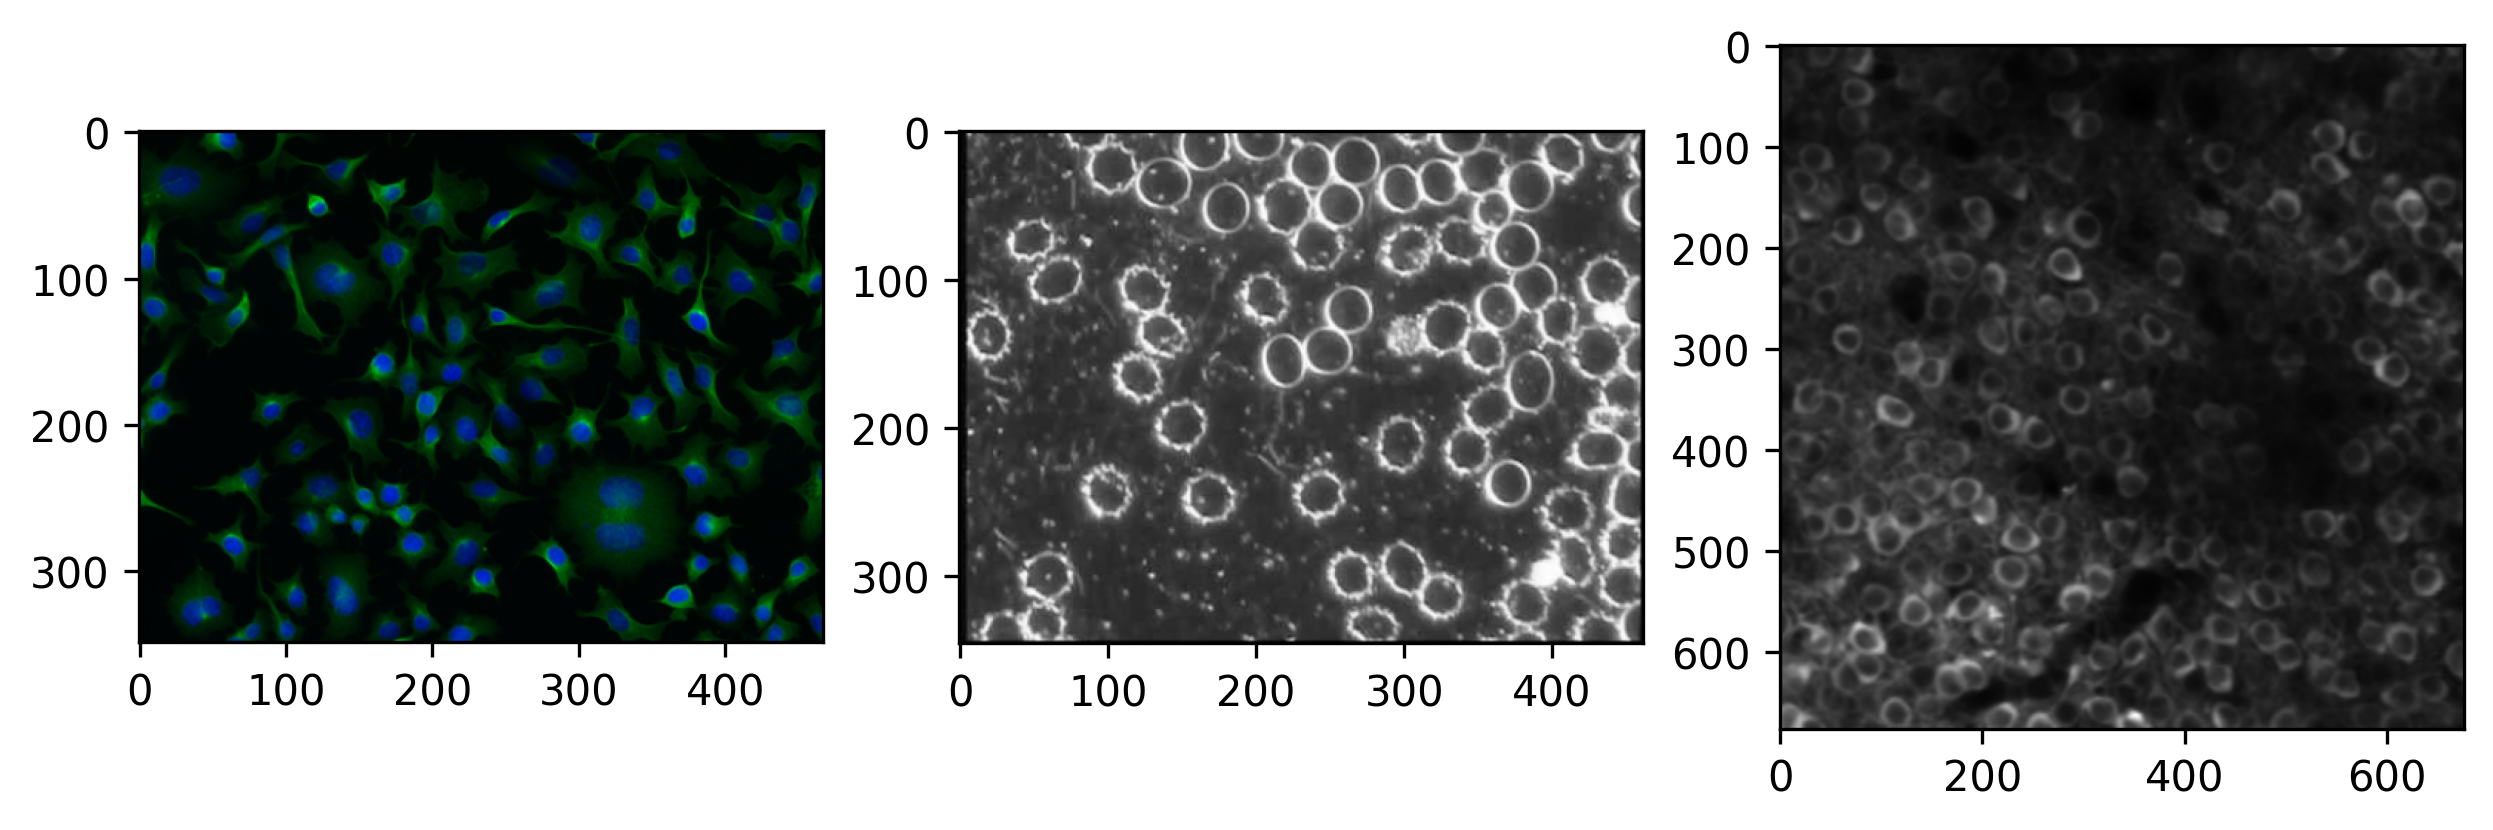

In [4]:
# Download images from website
urls = ['http://www.cellpose.org/static/images/img02.png',
        'http://www.cellpose.org/static/images/img03.png',
        'http://www.cellpose.org/static/images/img05.png',
        'http://www.cellpose.org/static/data/rgb_3D.tif']

files = list()

for url in urls:
    parts = urlparse(url)
    filename = os.path.basename(parts.path)

    if not os.path.exists(filename):
        sys.stderr.write(f'Downloading {url} to {filename}.\n')
        utils.download_url_to_file(url=url, dst=filename)
    files.append(filename)

# REPLACE FILES WITH IMAGE PATHS

imgs = [skimage.io.imread(i) for i in files]

plt.figure(figsize= (10, 5))

# CHECK ONLY THE 2D Image
for k, img in enumerate(imgs[:-1]):
    plt.subplot(1, 3, k+1)
    plt.imshow(img)

print(f'parts : {parts}.')
print(f'filename : {filename}.\n')

In [5]:
''''
RUN CELPPOSE ON 2D SAMPLE IMAGES
U-NET network
- Exclude the last download imgae, tiff is 3D image (75, 2, 75, 75)
- REFERENCE : https://github.com/MouseLand/cellpose/blob/main/cellpose/models.py
'''
imgs_2D = imgs[:-1]

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
# 'cyto'=cytoplasm model (세포질 모델); 'nuclei'=nucleus model (핵 모델); 
# 'cyto2'=cytoplasm model with additional user images

cypt_model = models.Cellpose(gpu= [False if use_GPU != 0 else use_GPU], 
                             model_type='cyto')

# channels = [cytoplasm, nucleus]
channels = [[2,3], [0,0], [0,0]]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

masks, flows, styles, diams = cypt_model.eval(
    x = imgs_2D, 
    diameter=None, 
    flow_threshold=None, 
    channels=channels)

'''
x : list of array of images
    can be list of 2d/3d images, or array of 2d/3d images, or 4d image array
channels : list 
    To segment images with cells in green and nuclei in blue, input [2,3]. 
    To segment one grayscale image and one image with cells in green and nuclei in blue, input [[0,0], [2,3]]
'''

'''
MODEL Architecture
class cellpose():
    def __init():
        ~~
        # CellposeModel == UnetModel
        self.cp = CellposeModel(device=self.device, gpu=self.gpu,
                            model_type=model_type,
                            diam_mean=self.diam_mean,
                            net_avg=net_avg)

        ~~
'''

2023-05-02 21:38:19,787 [INFO] TORCH CUDA version not installed/working.
2023-05-02 21:38:19,788 [INFO] >>>> using CPU
2023-05-02 21:38:19,789 [INFO] >> cyto << model set to be used
2023-05-02 21:38:19,942 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2023-05-02 21:38:19,944 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2023-05-02 21:38:39,237 [INFO] 100%|##########| 3/3 [00:19<00:00,  6.42s/it]
2023-05-02 21:38:39,238 [INFO] estimated cell diameter(s) in 19.29 sec
2023-05-02 21:38:39,239 [INFO] >>> diameter(s) = 
2023-05-02 21:38:39,239 [INFO] [29.38, 33.18, 30.58, ]
2023-05-02 21:38:39,240 [INFO] ~~~ FINDING MASKS ~~~
2023-05-02 21:38:47,771 [INFO] 100%|##########| 3/3 [00:08<00:00,  2.84s/it]
2023-05-02 21:38:47,805 [INFO] >>>> TOTAL TIME 27.86 sec


'\nMODEL Architecture\nclass cellpose():\n    def __init():\n        ~~\n        # CellposeModel == UnetModel\n        self.cp = CellposeModel(device=self.device, gpu=self.gpu,\n                            model_type=model_type,\n                            diam_mean=self.diam_mean,\n                            net_avg=net_avg)\n\n        ~~\n'

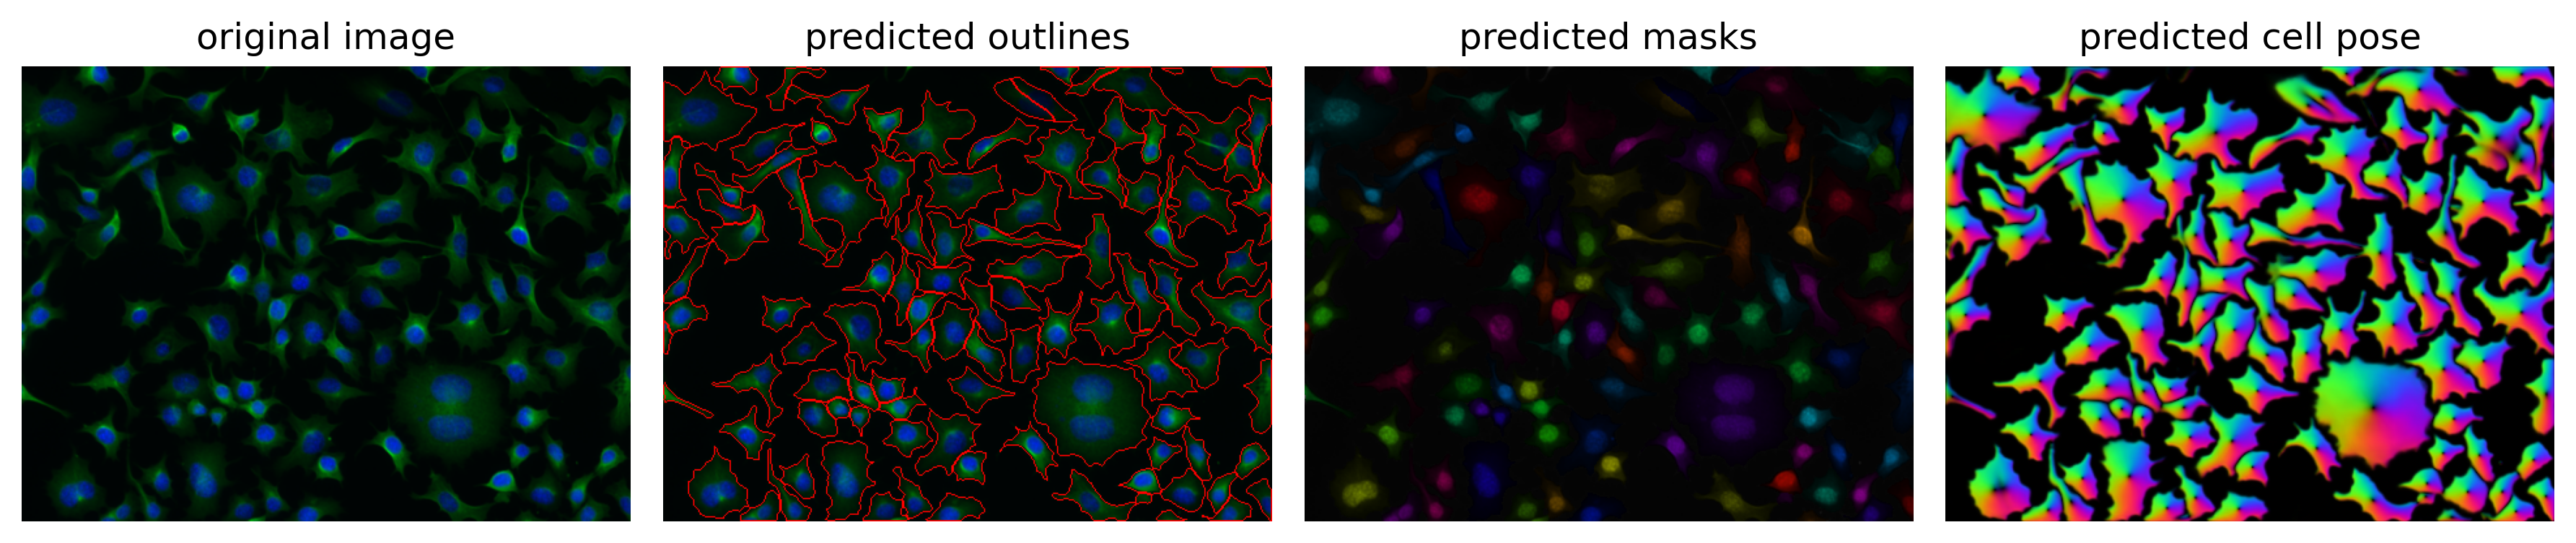

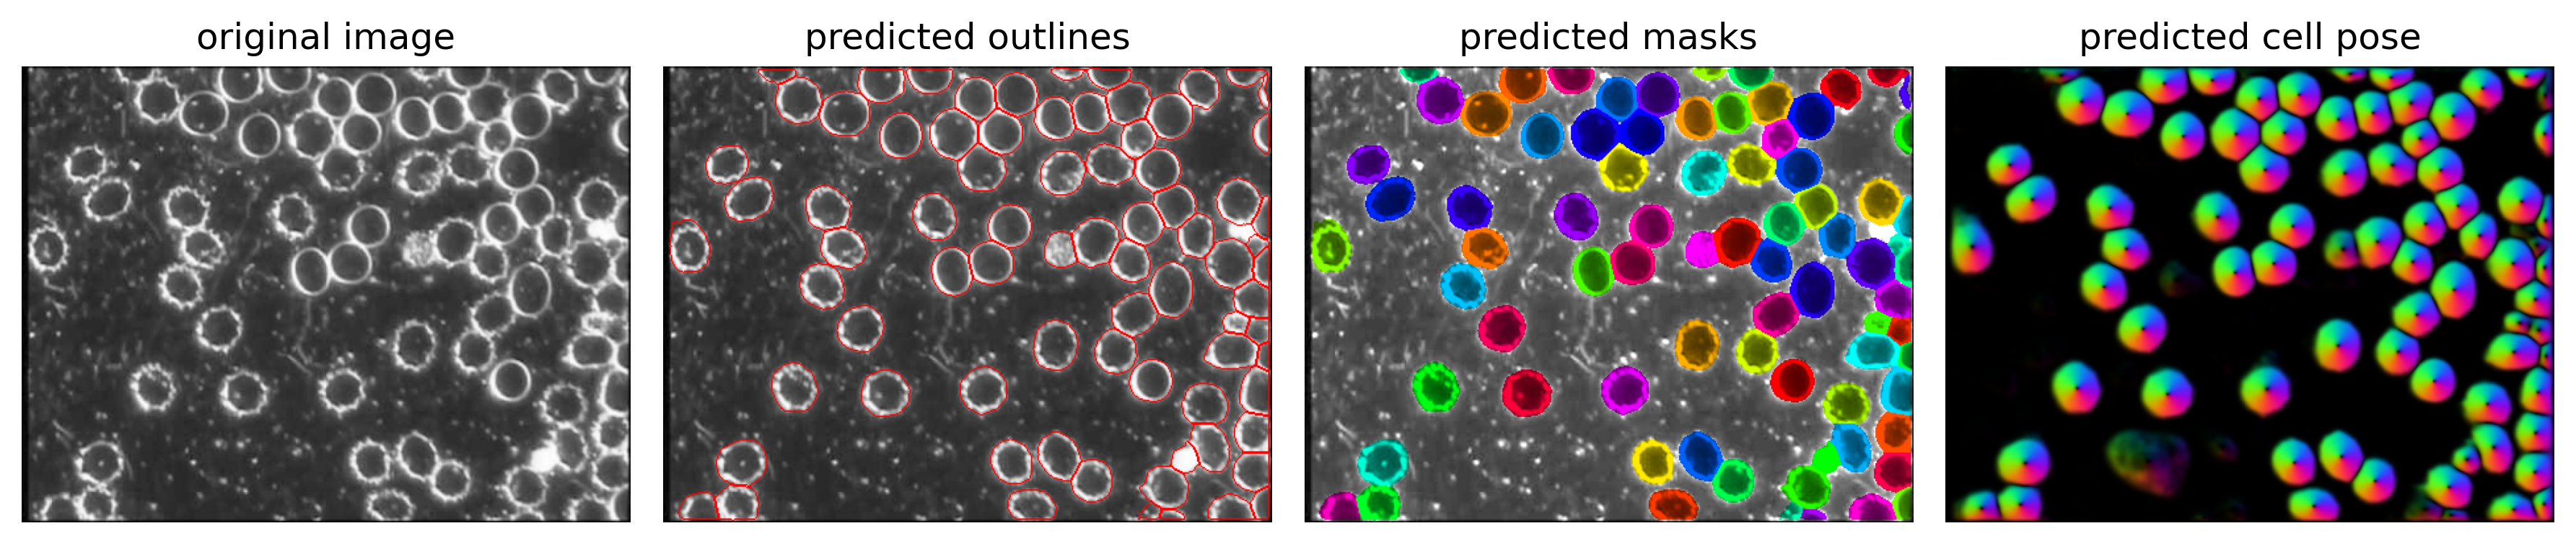

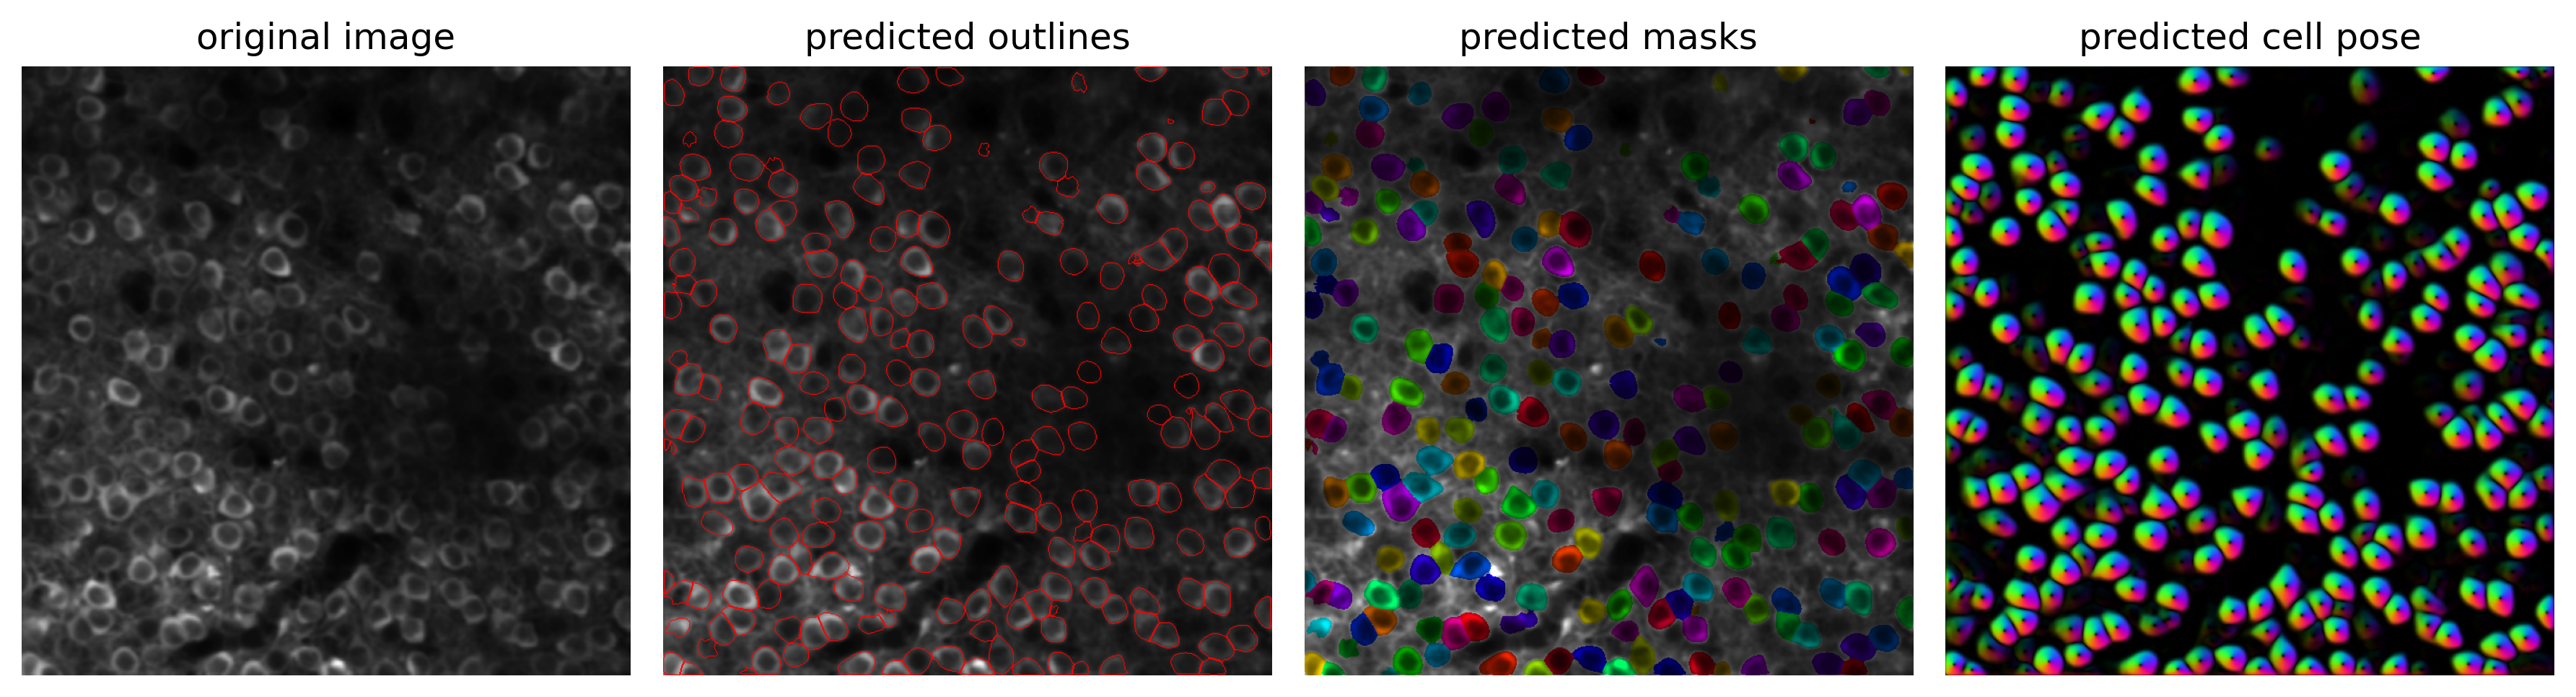

In [7]:
# Display Results

nimg = len(imgs_2D)

for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12, 5))

    plot.show_segmentation(fig, imgs[idx],
                          maski, flowi,
                          channels = channels[idx])
    '''
    img: 2D or 3D array
        image input into cellpose
    maski: int, 2D array 
        for image k, masks[k] output from Cellpose.eval, where 0=NO masks; 1,2,...=mask labels
        >> return the predicted outlines and predicted masks
    flowi: int, 2D array 
        for image k, flows[k][0] output from Cellpose.eval (RGB of flows)
        >> return the predicted cell pose
    '''

    plt.tight_layout()
    plt.show()
